In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud


This EDA is divided into three parts:  
- Importation of the dataset and direct modifications:  
        In this part, we are making direct modifications of the dataset for further usage, eg changing datatypes and adding potentially useful columns  
- Dealing with missing values
- Observations on the distribution of the data and detection of potential outliers  
        The goal of this part is to understand our dataset without taking into account the interaction between different variables. It is also in this part that we might detect potential outliers and deal with it.
- Potential identification of the target class based on the data:  
        We are here looking at the relationship existing between different variables, especially the one we want to predict (emotion associated with the tweet)


# Importation of the dataset and direct modifications

In [3]:
# Opening the dataset anc checking basic information about it

df = pd.read_csv("/Users/thibaut/Documents/GitHub/SentiVista/sentimentanalysis.csv", header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

print("----- DataFrame Head -----")
display(df.head())

print("\n----- DataFrame Shape -----")
print(df.shape)

print("\n----- DataFrame Info -----")
df.info()

----- DataFrame Head -----


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."



----- DataFrame Shape -----
(1600000, 6)

----- DataFrame Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Changing dtype into datetime

In [4]:
# Changing dtype of dates into datetime
dts = pd.to_datetime(df["date"], errors="coerce")
df["date"] = dts
display(df.head())

/var/folders/p9/3rt40nx54b1gd07nptsdsvv40000gn/T/ipykernel_20501/535022882.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dts = pd.to_datetime(df["date"], errors="coerce")


,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Adding tweet length column

In [5]:
# Adding a column with the amount of characters of each tweet

char_count = df['text'].apply(lambda tweet: len(tweet))
df['tweet_char_count'] = char_count

# Missing values in the dataset

## Looking at missing values

In [6]:
# Checking the missing values
print(df.isnull().sum()) 
print(df.duplicated().sum())

target              0
ids                 0
date                0
flag                0
user                0
text                0
tweet_char_count    0
dtype: int64
0


There are no missing values

# Observations on the distribution of the data and detection of potential outliers

## Distribution of target class

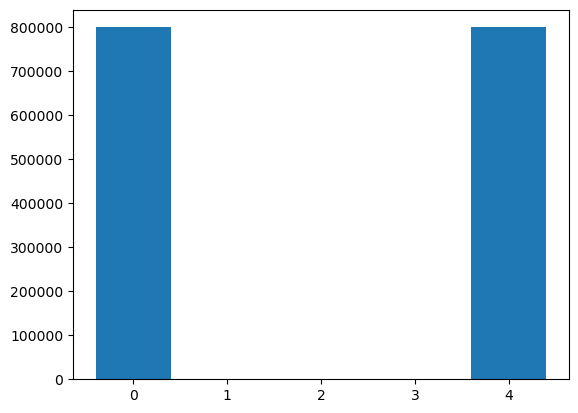

Number of tweets with negative emotion 800000
Number of tweets with positive emotion 800000


In [7]:
# Checking class repartition of target value (sentiment about a tweet)

fig, ax = plt.subplots()
ax.bar([0, 4], [df[df['target'] == 0]['target'].count(), df[df['target'] == 4]['target'].count()])
plt.show()

print('Number of tweets with negative emotion', df[df['target'] == 0]['target'].count())
print('Number of tweets with positive emotion', df[df['target'] == 4]['target'].count())

Classes are perfectly balanced, which is a good point considering the model might not be encouraged to predict a specific class only due to the fact that it is more represented in the training set. It will also have an impact on the evaluation metrics (eg confusion matrix) used as they more likely won't have noticeably different results.

## Tweets' length distribution

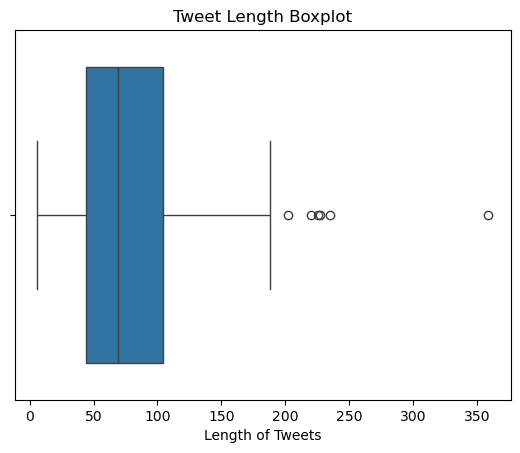

In [8]:
# Tweets' length distribution

sns.boxplot(x=df['tweet_char_count'])
plt.xlabel('Length of Tweets')
plt.title('Tweet Length Boxplot')
plt.show()

What is suprising here is that some tweets have a length over 140 characters, which should not be the case considering twitter's rules at the time they were collected

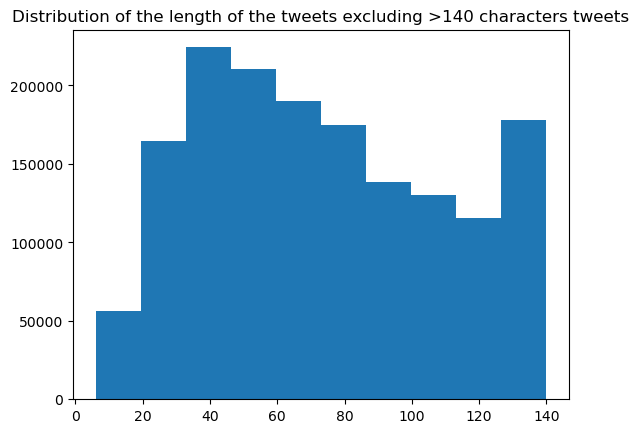

In [9]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df[df['tweet_char_count'] <= 140]['tweet_char_count'])
plt.title('Distribution of the length of the tweets excluding >140 characters tweets')

plt.show()

In [10]:
# information about the tweets' length distribution
df.loc[:, 'tweet_length'] = df['text'].str.split().map(len)
print(df['tweet_length'].describe())

count    1.600000e+06
mean     1.317550e+01
std      6.957641e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      6.400000e+01
Name: tweet_length, dtype: float64


### Dealing with unexpected tweets' length

Some tweets have a character length over 140, which by the time they were posted was not possible.  
We will look into it to understand why we have such values and what decisions will be made about it.  

In [11]:
# Looking at all the tweets with exceeding size
pd.set_option('display.max_colwidth', None)
df[df['tweet_char_count'] > 140]

,target,ids,date,flag,user,text,tweet_char_count,tweet_length
213,0,1467863684,2009-04-06 22:33:35,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie,142,23
279,0,1467881373,2009-04-06 22:38:18,NO_QUERY,ForzaRagazza,Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly.,145,18
343,0,1467898061,2009-04-06 22:42:49,NO_QUERY,Kevin_Lately,@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down,145,23
400,0,1467913111,2009-04-06 22:46:57,NO_QUERY,nssmom,"#3 woke up and was having an accident - &quot;It's pushing, it's pushing!&quot; he was crying because he couldn't stop from wetting his pants.",144,24
464,0,1467929915,2009-04-06 22:51:46,NO_QUERY,zeegirl602,"My bathtub drain is fired: it haz 1 job 2 do, &amp; it iz FAIL. I got all Drano on its ass, &amp; iz STILL NOT DRAINING. I wanna shower, dangit!!",146,31
...,...,...,...,...,...,...,...,...
1599460,4,2193452390,2009-06-16 08:28:42,NO_QUERY,comradephil,"@aw16 I must have skipped the &quot;pun&quot; setting, it appears to have been set to &quot;comedy-freeze&quot;, which would explain the dire lack of humour",157,24
1599557,4,2193475600,2009-06-16 08:30:33,NO_QUERY,johnbertr,@chinkchilla there's this brilliant add-on for firefox called &quot;Read Later&quot; makes you tag a site that u can read later. A semi-bookmark.,146,22
1599835,4,2193551788,2009-06-16 08:36:44,NO_QUERY,annamadeleine,@alexandervelky that's polite version - i only heard &quot;look much better on my bedroom floor&quot; how nice that you would hang it up for her,145,25
1599921,4,2193575912,2009-06-16 08:38:42,NO_QUERY,followtweety,I just switched back to Opera (using the moi skin). It's really fast &amp; stable to work with - I'm loving it http://www.opera.com/download/,142,23


In [12]:
# Taking a single tweet as an example for more readability
df[df['tweet_char_count'] > 140].iloc[0]['text']

"Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot;  O-: I like the look of the new transformer movie "

We see in that specific case that the broken character limit is due to some encoding issue. There is no major problem with this tweet. Let's look at the longer message if it's the case for all of them

In [13]:
df.iloc[df['tweet_char_count'].idxmax()]['text']

'5 days till new top gear  �?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?�'

This tweet has some real issue with numerous unknown characters

In [14]:
df[df['tweet_char_count'] > 200]['text']

1173142                                                                                                                                               I know pi to 12 digits.  &quot;c&quot;,&quot;h&quot;,&quot;u&quot;,&quot;c&quot;,&quot;k&quot;,&quot; &quot;,&quot;n&quot;,&quot;o&quot;,&quot;r&quot;,&quot;r&quot;,&quot;i&quot;,&quot;s&quot;.  now you know too   :matt:
1181007                                                                                                                                         @LyNn_4 &quot;Human,&quot; &quot;Rehab,&quot; &quot;Sex On Fire,&quot; &quot;So What,&quot; &quot;Reach Out,&quot; &quot;Womanizer,&quot; &quot;Keeps Getting Better,&quot; &quot;Love Lockdown&quot; &amp; &quot;Not Fair.&quot; 
1447652                                                                                                                                Thriving Ivory's song &quot;Twilight&quot; &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;

There aren't many tweets with too many characters. However considering the size of the dataset, it is no issue to remove them and takes less work than changing them one by one

## Tweet frequency over time

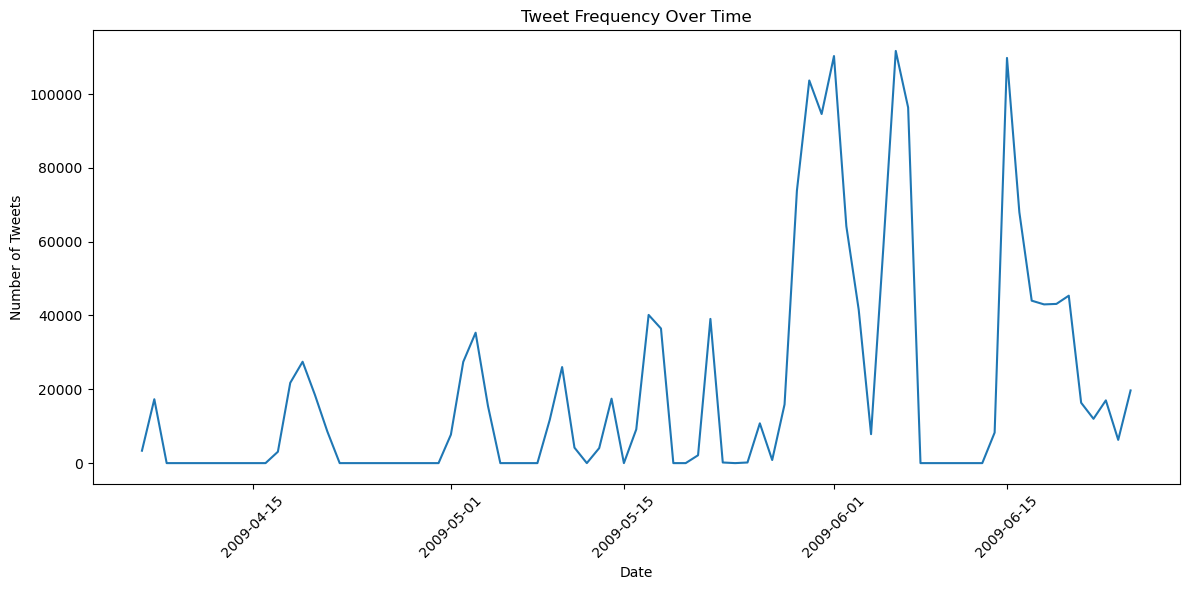

In [15]:
# Seeing when the collected tweets were posted

daily_counts = df.resample('D', on='date').size()
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Tweet Frequency Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Users that posted tweets

We want to look here if amongst the tweets, some users are appearing multiple times. This might have an impact as some users might be more enclined to post negative messages than others.

In [16]:
print('Number of unique users amongst 1 600 000 tweets:',len(df['user'].unique()))

Number of unique users amongst 1 600 000 tweets: 659775


# Potential identification of the target class based on the data

## Tweet length based on the target class

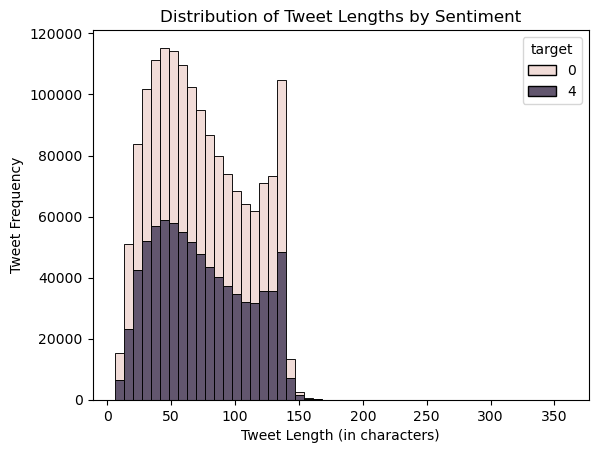

In [17]:
# Checking whether or not there is a length difference depending on the emotion

sns.histplot(data=df, x='tweet_char_count', hue='target', multiple='stack', bins=50)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Tweet Length (in characters)')
plt.ylabel('Tweet Frequency')
plt.show()


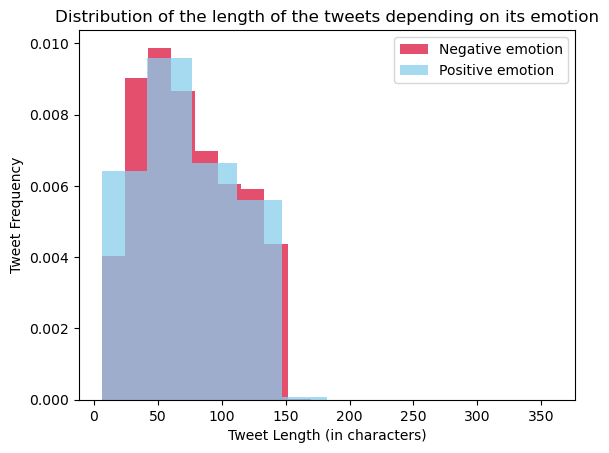

In [18]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df[df['target'] == 0]['tweet_char_count'], alpha = 0.75, density=True, label='Negative emotion', color='crimson')
ax.hist(df[df['target'] == 4]['tweet_char_count'], alpha = 0.75, density=True, label='Positive emotion', color='skyblue')

ax.set(title='Distribution of the length of the tweets depending on its emotion')
ax.legend()

plt.xlabel('Tweet Length (in characters)')
plt.ylabel('Tweet Frequency')

plt.show()

## Most frequent words based on target class

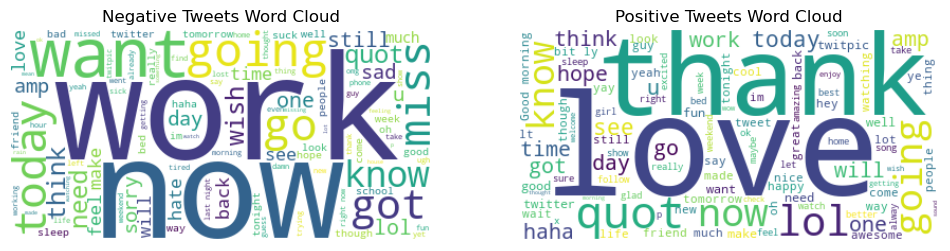

In [19]:
# Looking at the most common words ddepending on their emotion

neg_df = df[df['target'] == 0]
pos_df = df[df['target'] == 4]

neg_text_all = " ".join(neg_df['text'].astype(str))
pos_text_all = " ".join(pos_df['text'].astype(str))

neg_cloud = WordCloud(background_color='white', max_words=100).generate(neg_text_all)
pos_cloud = WordCloud(background_color='white', max_words=100).generate(pos_text_all)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(neg_cloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(pos_cloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')
plt.show()


We see that there is a difference in the words used in the different classes, eventhough some are present in both (e.g. "work). It is not surprising considering some moderation systems are using "banwords" to detect if a message is potentially banable or not. In this case however to detect wheter a tweet has negative emotion behind it or not we will use more complex models.

## Correlation matrix

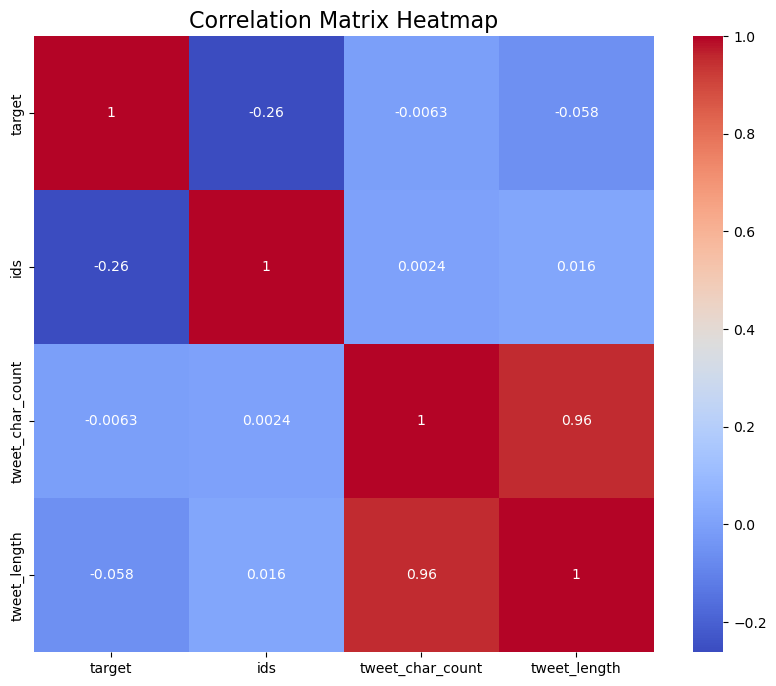

In [20]:
numerical_data = df.select_dtypes(include=['number'])
corr_matrix_data = numerical_data.corr()
plt.figure(figsize=(10, 8))
heatmap_plot = sns.heatmap(corr_matrix_data, annot=True, cmap="coolwarm")
heatmap_plot.set_title("Correlation Matrix Heatmap", fontdict={'fontsize': 16})
plt.show()


We need to pay attention at the id and its link to the emotion. There should not be such correlation and we do not want our model to "cheat" and rely on the id of the tweet to detect the emotion.

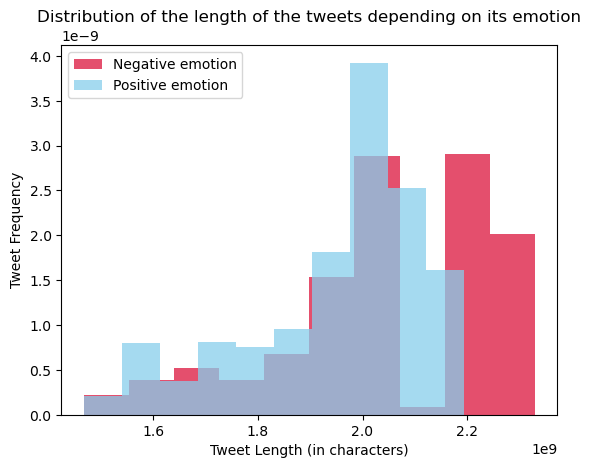

In [21]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df[df['target'] == 0]['ids'], alpha = 0.75, density=True, label='Negative emotion', color='crimson')
ax.hist(df[df['target'] == 4]['ids'], alpha = 0.75, density=True, label='Positive emotion', color='skyblue')

ax.set(title='Distribution of the length of the tweets depending on its emotion')
ax.legend()

plt.xlabel('Tweet Length (in characters)')
plt.ylabel('Tweet Frequency')

plt.show()

We clearly see here that the tweets with high id are mostly with negative emotion

## Emotion by user

In [22]:
users_mult_tweets = df[df['user'].isin(df['user'].value_counts()[df['user'].value_counts() > 2].index)]['user']
users_10tweets = df[df['user'].isin(df['user'].value_counts()[df['user'].value_counts() > 10].index)]['user']
df_multusers = df[df['user'].isin(users_mult_tweets)]
df_10tweets_users = df[df['user'].isin(users_10tweets)]
avg_mult_emotion = df_multusers.groupby('user')['target'].mean()
avg_10emotion = df_10tweets_users.groupby('user')['target'].mean()

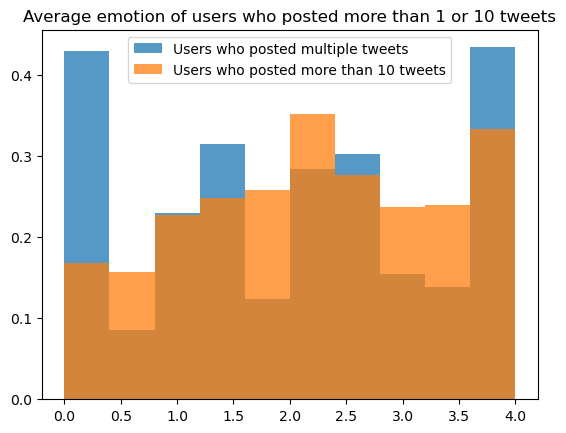

In [23]:
fig = plt.figure()
ax = plt.axes()

ax.hist(avg_mult_emotion, alpha = 0.75, label='Users who posted multiple tweets', density=True)
ax.hist(avg_10emotion, alpha = 0.75, label='Users who posted more than 10 tweets', density=True)

plt.legend()
plt.title('Average emotion of users who posted more than 1 or 10 tweets')

plt.show()

## title

In [24]:
%pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Sentiment140 Comprehensive EDA Report", explorative=True)
profile.to_notebook_iframe()


  Preparing metadata (setup.py) ... done
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 9.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.7/655.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 12.9 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 26.8 MB/s eta 0:00:0000:0100:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=20727ab6597b837e614e0dcde4a45b29bd82ba44bbc36117ba9d14c5a4afe37b
  Stored in directory: /Users/thibaut/Library/Caches/pip/wheels/5f/d4/d7/4189b07b590

/Users/thibaut/miniconda3/envs/DS/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'ipywidgets'